<a href="https://colab.research.google.com/github/ray021207/Comparative-Study-of-Approaches-for-Injury-Risk-Prediction-in-Athletes/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load the CSV file
df = pd.read_csv("mhealth_full.csv")

# 2. Separate features and labels
X = df.drop(columns=['activity_label', 'subject'])
y = df['activity_label']

# 3. Handle missing values (if any)
# Optional: check for missing values
print("Missing values per column:\n", X.isnull().sum())

# For now, drop any rows with missing values (can replace with .fillna if needed)
X = X.dropna()
y = y.loc[X.index]  # Keep label rows aligned

# 4. Normalize the features (z-score normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-test split (e.g., 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train size: {X_train.shape[0]} | Test size: {X_test.shape[0]}")


Missing values per column:
 acc_chest_x     0
acc_chest_y     0
acc_chest_z     0
ecg_1           0
ecg_2           0
acc_ankle_x     0
acc_ankle_y     0
acc_ankle_z     0
gyro_ankle_x    0
gyro_ankle_y    0
gyro_ankle_z    0
mag_ankle_x     0
mag_ankle_y     0
mag_ankle_z     0
acc_wrist_x     0
acc_wrist_y     0
acc_wrist_z     0
gyro_wrist_x    0
gyro_wrist_y    0
gyro_wrist_z    0
mag_wrist_x     0
mag_wrist_y     0
mag_wrist_z     0
dtype: int64
Train size: 838860 | Test size: 209715


In [8]:

# Create a dictionary to map label numbers to activity names
activity_map = {
    #0: "Little/no activity",
    1: "Standing still",
    2: "Sitting and relaxing",
    3: "Lying down",
    4: "Walking",
    5: "Climbing stairs",
    6: "Waist bends forward",
    7: "Frontal arm elevation",
    8: "Knees bending (crouching)",
    9: "Cycling",
    10: "Jogging",
    11: "Running",
    12: "Jumping"
}

# Create a new column with readable activity names
df['activity_name'] = df['activity_label'].map(activity_map)

# Preview the result
df[['activity_label', 'activity_name']].head()


,activity_label,activity_name
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


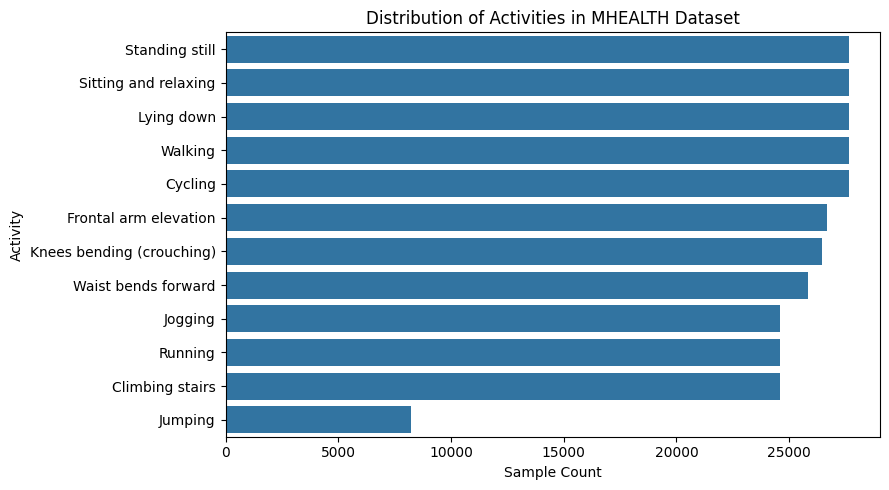

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.countplot(data=df, y='activity_name', order=df['activity_name'].value_counts().index)
plt.title("Distribution of Activities in MHEALTH Dataset")
plt.xlabel("Sample Count")
plt.ylabel("Activity")
plt.tight_layout()
plt.show()
